<a href="https://colab.research.google.com/github/RaphaelZH/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-/blob/master/2_Linear_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Making Predictions

In [1]:
import torch

In [2]:
w = torch.tensor(3.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

In [3]:
def forward(x):
  y = w * x + b
  return y

In [4]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [5]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

# 2. Linear Class

In [6]:
import torch
from torch.nn import Linear

In [7]:
torch.manual_seed(1)

In [8]:
model = Linear(in_features = 1, out_features = 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [9]:
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [10]:
x =torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [11]:
x =torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


# 3. Custom Modules

In [12]:
import torch
import torch.nn as nn

In [13]:
nn.Linear

torch.nn.modules.linear.Linear

In [14]:
nn.Module

torch.nn.modules.module.Module

In [15]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

In [16]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [17]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [18]:
torch.manual_seed(1)
model = LR(1, 1)

In [19]:
x = torch.tensor([1.0])
model.forward(x)

tensor([0.0739], grad_fn=<AddBackward0>)

In [20]:
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

# 4. Creating Dataset

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [22]:
X = torch.randn(10, 1)
print(X)

tensor([[ 0.1163],
        [ 0.7213],
        [ 0.5636],
        [ 1.1431],
        [ 0.8590],
        [ 0.7056],
        [-0.3406],
        [-1.2720],
        [-1.1948],
        [ 0.0250]])


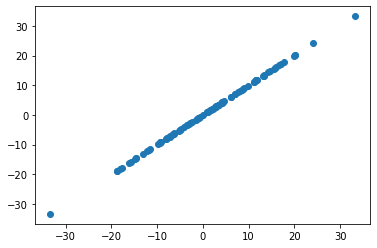

In [23]:
X = torch.randn(100, 1) * 10
y = X
plt.plot(X.numpy(), y.numpy(), 'o') # No more necessary to use .numpy().

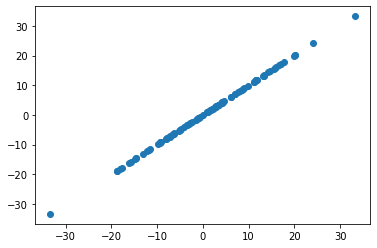

In [24]:
plt.plot(X, y, 'o')

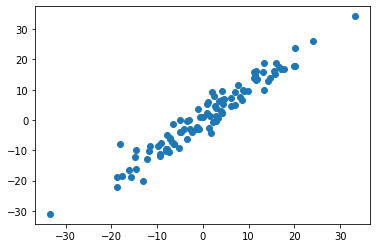

In [25]:
y = X + 3 * torch.randn(100, 1)
plt.plot(X, y, 'o')

Text(0.5, 0, 'X')

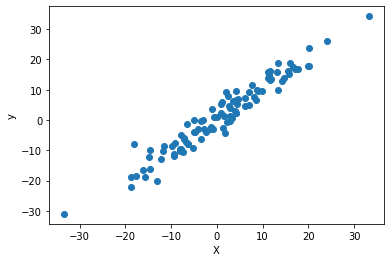

In [26]:
plt.plot(X, y, 'o')
plt.ylabel('y')
plt.xlabel('X')

In [27]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [28]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [29]:
print(model.parameters())

<generator object Module.parameters at 0x7fa7ba7a1f68>


In [30]:
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [31]:
w1 = w[0]
w1

tensor([0.5153], grad_fn=<SelectBackward>)

In [32]:
w1 = w[0][0]
w1

tensor(0.5153, grad_fn=<SelectBackward>)

In [33]:
b1 = b[0]
b1

tensor(-0.4414, grad_fn=<SelectBackward>)

In [34]:
print(w1, b1)

tensor(0.5153, grad_fn=<SelectBackward>) tensor(-0.4414, grad_fn=<SelectBackward>)


In [35]:
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [36]:
def get_params():
  return (w[0][0].item(), b[0].item()) # return w[0][0].item(), b[0].item()

In [37]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y) # plt.plot(X, y, 'o')
  plt.show()

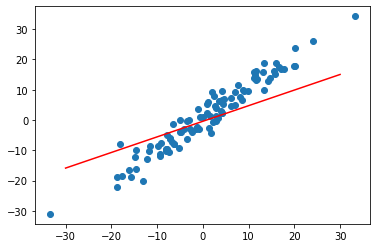

In [38]:
plot_fit('Initial Model')

# 5. Training - Code Implementation

In [39]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [40]:
X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)

In [41]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [42]:
torch.manual_seed(1)
model = LR(1, 1)

In [43]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [44]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr =0.001) # learning rate = 0.001
# For this example, it is necessary to play with learning rates.
# Because when it hits the local minimum, sometimes gives weird results(larger and larger).

In [45]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y) # loss(input, target)
  print("epoch:" , i, "loss:", loss.item())
  losses.append(loss.item()) # better than losses.append(loss)
  optimizer.zero_grad() # Clears the gradients of all optimized 'torch.Tensor's.
  loss.backward()
  optimizer.step() # Performs a single optimization step (parameter update).

epoch: 0 loss: 36.448333740234375
epoch: 1 loss: 25.847068786621094
epoch: 2 loss: 19.274919509887695
epoch: 3 loss: 15.200483322143555
epoch: 4 loss: 12.674422264099121
epoch: 5 loss: 11.108229637145996
epoch: 6 loss: 10.137073516845703
epoch: 7 loss: 9.53479290008545
epoch: 8 loss: 9.161184310913086
epoch: 9 loss: 8.92933464050293
epoch: 10 loss: 8.785365104675293
epoch: 11 loss: 8.695876121520996
epoch: 12 loss: 8.640158653259277
epoch: 13 loss: 8.605379104614258
epoch: 14 loss: 8.583581924438477
epoch: 15 loss: 8.569830894470215
epoch: 16 loss: 8.56106948852539
epoch: 17 loss: 8.555403709411621
epoch: 18 loss: 8.551655769348145
epoch: 19 loss: 8.549100875854492
epoch: 20 loss: 8.547282218933105
epoch: 21 loss: 8.545923233032227
epoch: 22 loss: 8.54485034942627
epoch: 23 loss: 8.54395580291748
epoch: 24 loss: 8.543170928955078
epoch: 25 loss: 8.542455673217773
epoch: 26 loss: 8.541786193847656
epoch: 27 loss: 8.541145324707031
epoch: 28 loss: 8.540521621704102
epoch: 29 loss: 8.5399

Text(0.5, 0, 'epoch')

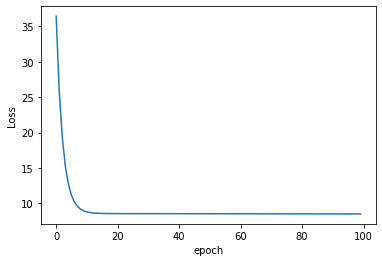

In [46]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [47]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

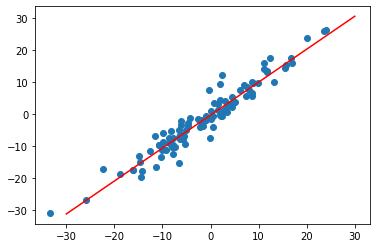

In [48]:
plot_fit("Trained Model")